In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [8]:
csvpath='merged_file.csv'
election=pd.read_csv(csvpath)
election.head()

,Unnamed: 0,State,State Abbr,County,DEM Votes,GOP Votes,Total Votes,DEM %,GOP %,Total Population,...,Education (Bachelors),Education (Masters),Education (Professional),Education (Doctorate),Median Income,Income Per Capita,Median Home Value,Pop in Labor Force,Pop Not in Labor Force,Unemployed
0,0,Indiana,IN,Adams County,2802,9642,13039,0.214894,0.739474,34813.0,...,2311.0,768.0,126.0,64.0,47572.0,21173.0,114600.0,15975.0,8948.0,872.0
1,1,Indiana,IN,Allen County,55222,83801,145787,0.378785,0.574818,365565.0,...,42160.0,16367.0,4152.0,1694.0,49574.0,26058.0,116400.0,186706.0,93216.0,13152.0
2,2,Indiana,IN,Bartholomew County,9841,20637,32389,0.303838,0.637161,80203.0,...,9685.0,5255.0,499.0,632.0,55874.0,28631.0,137500.0,41710.0,21169.0,2165.0
3,3,Indiana,IN,Benton County,860,2579,3654,0.235359,0.705802,8709.0,...,753.0,188.0,42.0,12.0,48069.0,23181.0,81500.0,4368.0,2364.0,201.0
4,4,Indiana,IN,Blackford County,1243,3349,4822,0.257777,0.694525,12364.0,...,546.0,315.0,51.0,42.0,38791.0,21980.0,67100.0,5763.0,4263.0,480.0


In [9]:
election["GOP %"]=election["GOP %"]*100

In [10]:
a=0
b=0
def LinearRegression(x,y):
    # Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
    #Calculate the linear regression values to be plotted against weight
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #plot the regression values to form the regression line
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(a,b),fontsize=15,color="red");
    
    print(f"The r-squared is: {rvalue}")
    print(line_eq)

In [11]:
a=election["Total Population"].astype(float)
z=a.tolist()
pop_reduced=[]
for item in z:
    b=item/500
    pop_reduced.append(b)

The r-squared is: -0.6858586589534691
y = -0.0x + 70.48


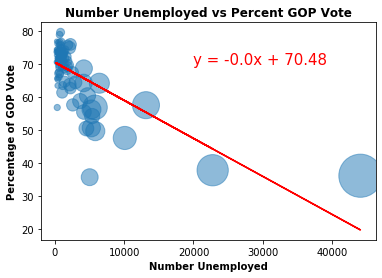

In [12]:
#create a scatterplot for unemployment vs %Republican vote
plt.scatter(election["Unemployed"],election["GOP %"],s=pop_reduced*10000, alpha=0.5);
plt.xlabel("Number Unemployed",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
plt.title("Number Unemployed vs Percent GOP Vote",weight="bold");

a=20000
b=70
LinearRegression(election["Unemployed"],election["GOP %"])

In [13]:
unemployment=pd.DataFrame({"County":election["County"],"Total Population":election["Total Population"],
                           "Unemployed":election["Unemployed"],"GOP %":election["GOP %"]})

In [14]:
unemployment["% Unemployment"]=(election["Unemployed"]/(election["Pop in Labor Force"]+election["Unemployed"]))*100

In [15]:
unemployment.head()

,County,Total Population,Unemployed,GOP %,% Unemployment
0,Adams County,34813.0,872.0,73.947389,5.175996
1,Allen County,365565.0,13152.0,57.481806,6.580672
2,Bartholomew County,80203.0,2165.0,63.716076,4.934473
3,Benton County,8709.0,201.0,70.580186,4.399212
4,Blackford County,12364.0,480.0,69.452509,7.688611


The r-squared is: -0.2719785036326958
y = -1.9x + 78.86


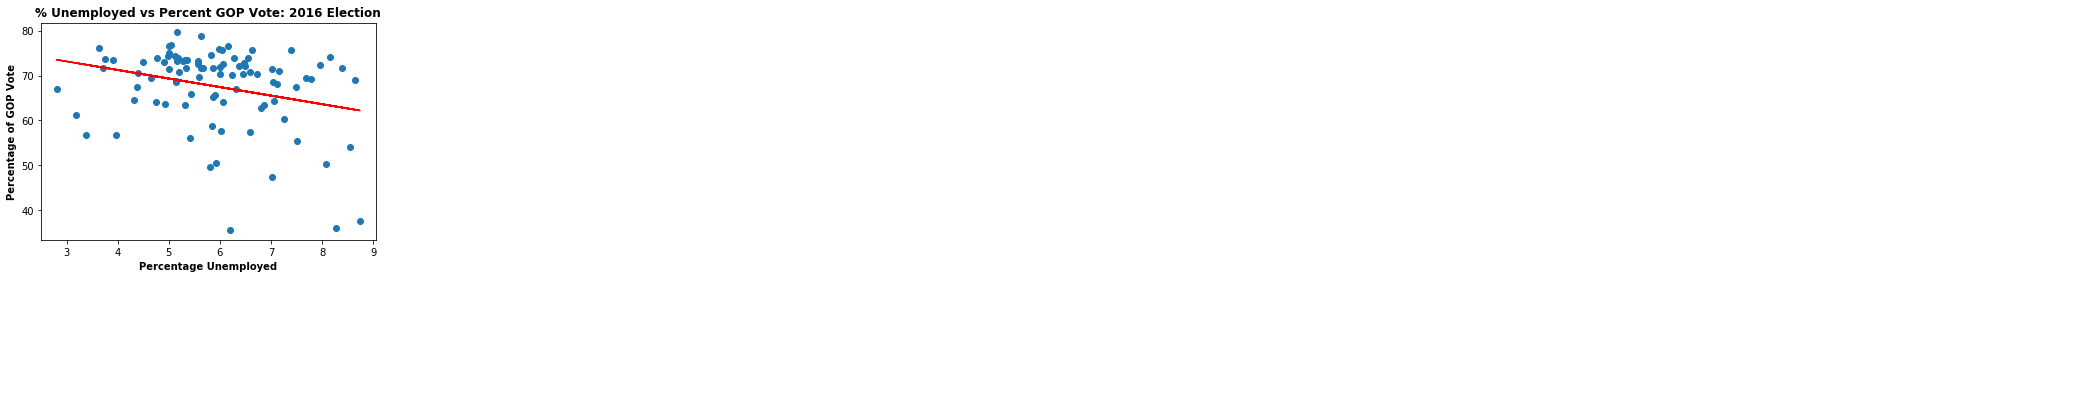

<Figure size 1440x2880 with 0 Axes>

In [16]:
#create a scatterplot for unemployment vs %Republican vote
plt.scatter(unemployment["% Unemployment"],unemployment["GOP %"],marker="o");
plt.xlabel("Percentage Unemployed",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
plt.title("% Unemployed vs Percent GOP Vote: 2016 Election",weight="bold");

a=40
b=0.5
LinearRegression(unemployment["% Unemployment"],unemployment["GOP %"])

plt.figure(figsize=(20,40));


The r-squared is: -0.2719785036326958
y = -1.9x + 78.86


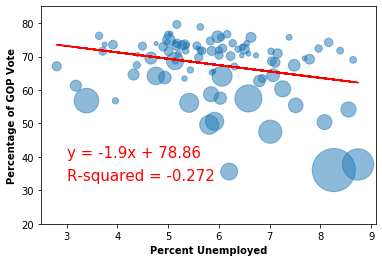

In [17]:
#create a scatterplot for unemployment vs %Republican vote
plt.scatter(unemployment["% Unemployment"],unemployment["GOP %"],s=pop_reduced*10000, alpha=0.5);
plt.xlabel("Percent Unemployed",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
#plt.title("Percent Unemployment vs Percent GOP Vote",weight="bold");
plt.ylim(20,85)
a=3
b=40
LinearRegression(unemployment["% Unemployment"],unemployment["GOP %"])
plt.annotate(f"R-squared = -0.272",(3,33),fontsize=15,color='red');
plt.savefig('unemployment.png')

The r-squared is: 0.256101423289009
y = 23951.16x + -69863.17


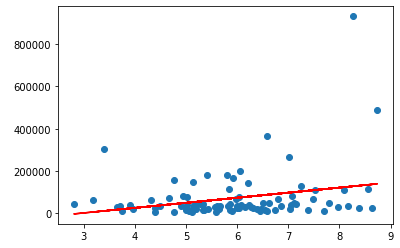

In [18]:
plt.scatter(unemployment["% Unemployment"],unemployment["Total Population"]);#,s=pop_reduced*10000, alpha=0.5);
a=1.5
b=600000
LinearRegression(unemployment["% Unemployment"],unemployment["Total Population"])
plt.annotate(f"R-squared = 0.357",(1.5,500000),fontsize=15,color='red');

In [19]:
urban_counties=["LaPorte County","Lake County","Porter County","St. Joseph County","Elkhart County","Newton County",
               "Jasper County","Benton County","Whitley County","Allen County","Wells County","Tippecanoe County",
               "Carroll County","Howard County","Tipton County","Madison County","Delaware County",
               "Hamilton County","Boone County","Putnam County","Hendricks County","Marion County",
               "Hancock County","Vermillion County","Vigo County","Clay County","Owen County","Morgan County",
               "Johnson County", "Shelby County","Sullivan County","Greene County","Monroe County",
               "Brown County","Bartholomew County","Franklin County","Dearborn County","Ohio County",
               "Clark County","Washington County","Floyd County","Harrison County","Warrick County",
               "Gibson County","Vanderburgh County","Posey County"]
print(len(urban_counties))

46


https://www.ers.usda.gov/webdocs/DataFiles/53180/25569_IN.pdf?v=0

In [20]:
urban=pd.DataFrame()
unemployed=[]

for county in urban_counties:
    info_row=election.loc[election["County"]==county]
    #print(info_row)
    

In [21]:
urban=election.loc[(election["County"]=="LaPorte County")|(election["County"]=="Lake County")|
                     (election["County"]=="Porter County")|(election["County"]=="St. Joseph County")|
                     (election["County"]=="Elkhart County")|(election["County"]=="Newton County")|
                     (election["County"]=="Jasper County")|(election["County"]=="Benton County")|
                     (election["County"]=="Whitely County")|(election["County"]=="Allen County")|
                     (election["County"]=="Wells County")|(election["County"]=="Tippecanoe County")|
                     (election["County"]=="Carroll County")|(election["County"]=="Howard County")|
                     (election["County"]=="Tipton County")|(election["County"]=="Madison County")|
                     (election["County"]=="Delaware County")|(election["County"]=="Hamilton County")|
                     (election["County"]=="Boone County")|(election["County"]=="Putnam County")|
                     (election["County"]=="Hendricks County")|(election["County"]=="Marion County")|
                     (election["County"]=="Hancock County")|(election["County"]=="Vermillion County")|
                     (election["County"]=="Vigo County")|(election["County"]=="Clay County")|
                     (election["County"]=="Owen County")|(election["County"]=="Morgan County")|
                     (election["County"]=="Johnson County")|(election["County"]=="Shelby County")|
                     (election["County"]=="Sullivan County")|(election["County"]=="Greene County")|
                     (election["County"]=="Monroe County")|(election["County"]=="Brown County")|
                     (election["County"]=="Bartholomew County")|(election["County"]=="Franklin County")|
                     (election["County"]=="Dearborn County")|(election["County"]=="Ohio County")|
                     (election["County"]=="Clark County")|(election["County"]=="Washington County")|
                     (election["County"]=="Floyd County")|(election["County"]=="Harrison County")|
                     (election["County"]=="Warrick County")|(election["County"]=="Gibson County")|
                     (election["County"]=="Vanderburgh County")|(election["County"]=="Posey County")]


In [22]:
urban.head()
urban["% Unemployment"]=(urban["Unemployed"]/(urban["Pop in Labor Force"]+urban["Unemployed"]))*100

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
urban.head()

,Unnamed: 0,State,State Abbr,County,DEM Votes,GOP Votes,Total Votes,DEM %,GOP %,Total Population,...,Education (Masters),Education (Professional),Education (Doctorate),Median Income,Income Per Capita,Median Home Value,Pop in Labor Force,Pop Not in Labor Force,Unemployed,% Unemployment
1,1,Indiana,IN,Allen County,55222,83801,145787,0.378785,57.481806,365565.0,...,16367.0,4152.0,1694.0,49574.0,26058.0,116400.0,186706.0,93216.0,13152.0,6.580672
2,2,Indiana,IN,Bartholomew County,9841,20637,32389,0.303838,63.716076,80203.0,...,5255.0,499.0,632.0,55874.0,28631.0,137500.0,41710.0,21169.0,2165.0,4.934473
3,3,Indiana,IN,Benton County,860,2579,3654,0.235359,70.580186,8709.0,...,188.0,42.0,12.0,48069.0,23181.0,81500.0,4368.0,2364.0,201.0,4.399212
5,5,Indiana,IN,Boone County,10181,19654,32061,0.317551,61.301893,61884.0,...,4608.0,1828.0,1084.0,72774.0,40487.0,195900.0,32688.0,14337.0,1074.0,3.181091
6,6,Indiana,IN,Brown County,2518,5015,7908,0.318412,63.416793,14965.0,...,1076.0,169.0,105.0,56323.0,30279.0,171600.0,7330.0,5053.0,412.0,5.321622


In [24]:
b=urban["Total Population"].astype(float)
v=b.tolist()
urban_pop_reduced=[]
for item in v:
    c=item/500
    urban_pop_reduced.append(c)

The r-squared is: -0.39277115259410866
y = -3.24x + 83.03


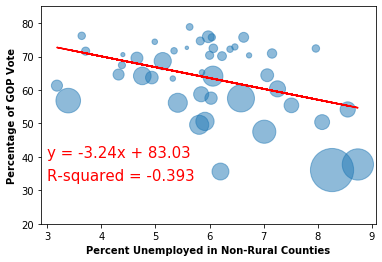

In [25]:
#create a scatterplot for unemployment vs %Republican vote-URBAN COUNTIES
plt.scatter(urban["% Unemployment"],urban["GOP %"],s=urban_pop_reduced*10000, alpha=0.5);
plt.xlabel("Percent Unemployed in Non-Rural Counties",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
#plt.title("Percent Unemployment vs Percent GOP Vote",weight="bold");
plt.ylim(20,85)
a=3
b=40
LinearRegression(urban["% Unemployment"],urban["GOP %"])
plt.annotate(f"R-squared = -0.393",(3,33),fontsize=15,color='red');
plt.savefig('unemployment_urban.png')

In [26]:
sorted=election.sort_values("Total Population",ascending=False).reset_index(drop=True)

In [27]:
rural=election.loc[(election["County"]=="LaGrange County")|(election["County"]=="Steuben County")|
                     (election["County"]=="Noble County")|(election["County"]=="DeKalb County")|
                     (election["County"]=="Starke County")|(election["County"]=="Marshall County")|
                     (election["County"]=="Kosciusko County")|(election["County"]=="Pulaski County")|
                     (election["County"]=="Fulton County")|(election["County"]=="Huntington County")|
                     (election["County"]=="Wabash County")|(election["County"]=="Miami County")|
                     (election["County"]=="Cass County")|(election["County"]=="White County")|
                     (election["County"]=="Grant County")|(election["County"]=="Blackford County")|
                     (election["County"]=="Adams County")|(election["County"]=="Jay County")|
                     (election["County"]=="Randolph County")|(election["County"]=="Wayne County")|
                     (election["County"]=="Henry County")|(election["County"]=="Rush County")|
                     (election["County"]=="Fayette County")|(election["County"]=="Union County")|
                     (election["County"]=="Decatur County")|(election["County"]=="Clinton County")|
                     (election["County"]=="Warren County")|(election["County"]=="Fountain County")|
                     (election["County"]=="Montgomery County")|(election["County"]=="Parke County")|
                     (election["County"]=="Ripley County")|(election["County"]=="Switzerland County")|
                     (election["County"]=="Jefferson County")|(election["County"]=="Jennings County")|
                     (election["County"]=="Scott County")|(election["County"]=="Jackson County")|
                     (election["County"]=="Lawrence County")|(election["County"]=="Orange County")|
                     (election["County"]=="Crawford County")|(election["County"]=="Perry County")|
                     (election["County"]=="Spencer County")|(election["County"]=="Dubois County")|
                     (election["County"]=="Martin County")|(election["County"]=="Daviess County")|
                     (election["County"]=="Knox County")|(election["County"]=="Pike County")]


In [28]:
rural["% Unemployment"]=(rural["Unemployed"]/(rural["Pop in Labor Force"]+rural["Unemployed"]))*100

C:\Users\Michael\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
rural.head()

,Unnamed: 0,State,State Abbr,County,DEM Votes,GOP Votes,Total Votes,DEM %,GOP %,Total Population,...,Education (Masters),Education (Professional),Education (Doctorate),Median Income,Income Per Capita,Median Home Value,Pop in Labor Force,Pop Not in Labor Force,Unemployed,% Unemployment
0,0,Indiana,IN,Adams County,2802,9642,13039,0.214894,73.947389,34813.0,...,768.0,126.0,64.0,47572.0,21173.0,114600.0,15975.0,8948.0,872.0,5.175996
4,4,Indiana,IN,Blackford County,1243,3349,4822,0.257777,69.452509,12364.0,...,315.0,51.0,42.0,38791.0,21980.0,67100.0,5763.0,4263.0,480.0,7.688611
8,8,Indiana,IN,Cass County,3758,9697,14135,0.265865,68.602759,38324.0,...,987.0,152.0,135.0,43918.0,22625.0,82500.0,18863.0,11557.0,1429.0,7.042184
11,11,Indiana,IN,Clinton County,2819,8530,11896,0.236970,71.704775,32692.0,...,887.0,94.0,40.0,50096.0,23260.0,98700.0,16268.0,8714.0,977.0,5.665410
12,12,Indiana,IN,Crawford County,1323,3013,4591,0.288173,65.628403,10582.0,...,221.0,57.0,11.0,41173.0,19756.0,88600.0,4626.0,3867.0,290.0,5.899105


In [30]:
f=rural["Total Population"].astype(float)
g=f.tolist()
rural_pop_reduced=[]
for item in g:
    h=item/100
    rural_pop_reduced.append(h)

The r-squared is: -0.09387455131694734
y = -0.31x + 73.07


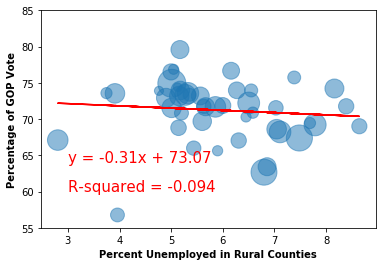

In [31]:
#create a scatterplot for unemployment vs %Republican vote-URBAN COUNTIES
plt.scatter(rural["% Unemployment"],rural["GOP %"],s=rural_pop_reduced*10000, alpha=0.5);
plt.xlabel("Percent Unemployed in Rural Counties",weight="bold");
plt.ylabel("Percentage of GOP Vote",weight="bold");
#plt.title("Percent Unemployment vs Percent GOP Vote",weight="bold");
plt.ylim(55,85)
a=3
b=64
LinearRegression(rural["% Unemployment"],rural["GOP %"])
plt.annotate(f"R-squared = -0.094",(3,60),fontsize=15,color='red');
plt.savefig('unemployment_rural.png')